In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('../input/sejong-ai-challenge-p1/train.csv')
test=pd.read_csv('../input/sejong-ai-challenge-p1/test.csv')
submit=pd.read_csv('../input/sejong-ai-challenge-p1/sample_submission.csv')

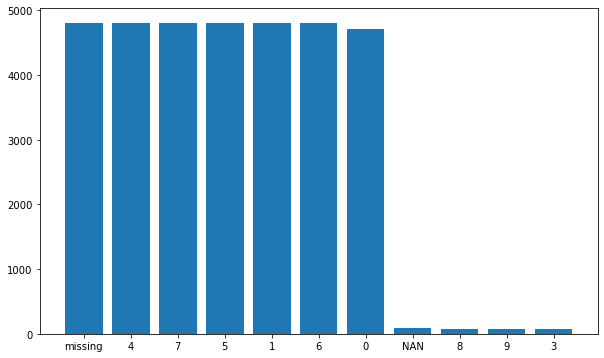

In [3]:
# 데이터 불균형
# 이상 label 발견. label의 object화. 즉, 숫자로 바꿔준다. 

temp=train['label'].value_counts()

fig,ax=plt.subplots(1,1,figsize=(10,6))

ax.bar(temp.index,temp)

plt.show()

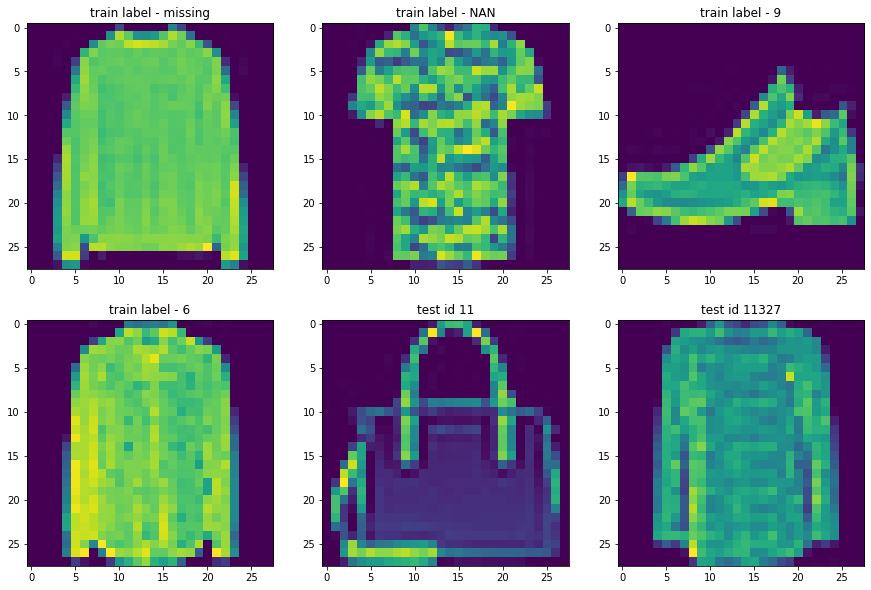

In [4]:
# 처음 데이터에서 to_numpy함수때문인지 PIL 라이브러리인지 잘못사용하여 object형태로 됐다. 
# 숫자로 다시 표시

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0,0].imshow(train.iloc[33838][1:-1].values.astype(int).reshape(28,28))
ax[0,0].set_title('train label - missing')

ax[0,1].imshow(train.iloc[3][1:-1].values.astype(int).reshape(28,28))
ax[0,1].set_title('train label - NAN')

ax[0,2].imshow(train.iloc[1][1:-1].values.astype(int).reshape(28,28))
ax[0,2].set_title('train label - 9')

ax[1,0].imshow(train.iloc[2][1:-1].values.astype(int).reshape(28,28))
ax[1,0].set_title('train label - 6')

ax[1,1].imshow(test.iloc[0][1:].values.astype(int).reshape(28,28))
ax[1,1].set_title('test id 11')

ax[1,2].imshow(test.iloc[1613][1:].values.astype(int).reshape(28,28))
ax[1,2].set_title('test id 11327')

plt.show()

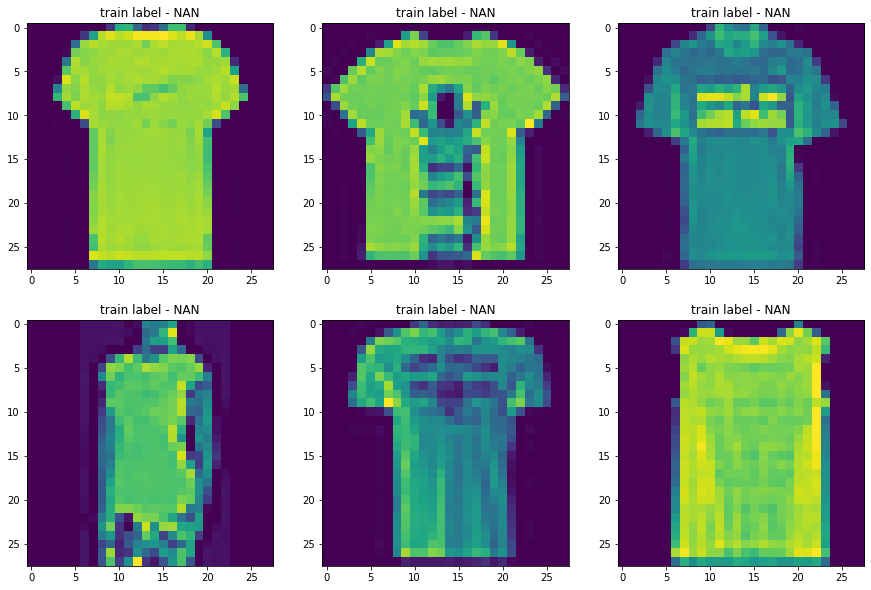

In [5]:
# train[train['label']=='NAN']

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0,0].imshow(train.iloc[10][1:-1].values.astype(int).reshape(28,28))
ax[0,0].set_title('train label - NAN')

ax[0,1].imshow(train.iloc[12][1:-1].values.astype(int).reshape(28,28))
ax[0,1].set_title('train label - NAN')

ax[0,2].imshow(train.iloc[34][1:-1].values.astype(int).reshape(28,28))
ax[0,2].set_title('train label - NAN')

ax[1,0].imshow(train.iloc[66][1:-1].values.astype(int).reshape(28,28))
ax[1,0].set_title('train label - NAN')

ax[1,1].imshow(train.iloc[724][1:-1].values.astype(int).reshape(28,28))
ax[1,1].set_title('train label - NAN')

ax[1,2].imshow(train.iloc[730][1:-1].values.astype(int).reshape(28,28))
ax[1,2].set_title('train label - NAN')

plt.show()

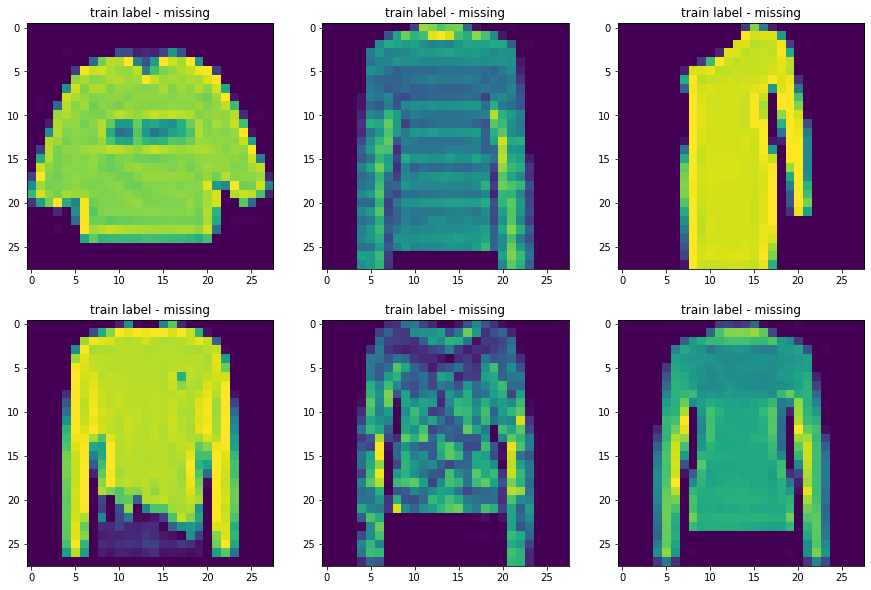

In [6]:
# train[train['label']=='missing']

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0,0].imshow(train.iloc[0][1:-1].values.astype(int).reshape(28,28))
ax[0,0].set_title('train label - missing')

ax[0,1].imshow(train.iloc[13][1:-1].values.astype(int).reshape(28,28))
ax[0,1].set_title('train label - missing')

ax[0,2].imshow(train.iloc[27][1:-1].values.astype(int).reshape(28,28))
ax[0,2].set_title('train label - missing')

ax[1,0].imshow(train.iloc[30][1:-1].values.astype(int).reshape(28,28))
ax[1,0].set_title('train label - missing')

ax[1,1].imshow(train.iloc[39][1:-1].values.astype(int).reshape(28,28))
ax[1,1].set_title('train label - missing')

ax[1,2].imshow(train.iloc[33802][1:-1].values.astype(int).reshape(28,28))
ax[1,2].set_title('train label - missing')

plt.show()

의미가 없다. missing과 nan은 몇몇개 섞여있어서 그 자체로 인정해준다. 

label 처리

In [7]:
train['label']=train['label'].apply(lambda x:'2' if x=='missing' else x)
train['label']=train['label'].apply(lambda x:'10' if x=='NAN' else x)

In [8]:
import tensorflow as tf

y=train['label'].astype(int).values

y=tf.keras.utils.to_categorical(y,num_classes=11)

In [9]:
# grey scale 정규화.
X=train.drop(['id','label'],axis=1)/255
X=X.values.reshape(-1,28,28,1)

X_test=test.drop('id',axis=1)/255
X_test=X_test.values.reshape(-1,28,28,1)

tf cnn (unet)

In [10]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same',input_shape=(28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,strides=1,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=11,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0

In [12]:
early_stop=tf.keras.callbacks.EarlyStopping(patience=5,verbose=1,mode='min')
msave=tf.keras.callbacks.ModelCheckpoint('base_cnn.h5',save_best_only=True,verbose=1)

In [13]:
history=model.fit(X,
                  y, 
                  epochs=5, 
                  batch_size=64, 
                  verbose=1, 
                  validation_split=0.2,
                  callbacks=[early_stop,msave])

Epoch 1/5
423/423 [==============================] - 66s 154ms/step - loss: 0.6675 - accuracy: 0.7727 - val_loss: 0.6681 - val_accuracy: 0.7643

Epoch 00001: val_loss improved from inf to 0.66807, saving model to base_cnn.h5
Epoch 2/5
423/423 [==============================] - 64s 152ms/step - loss: 0.3251 - accuracy: 0.8847 - val_loss: 0.3509 - val_accuracy: 0.8706

Epoch 00002: val_loss improved from 0.66807 to 0.35092, saving model to base_cnn.h5
Epoch 3/5
423/423 [==============================] - 65s 153ms/step - loss: 0.2723 - accuracy: 0.8999 - val_loss: 0.3137 - val_accuracy: 0.8840

Epoch 00003: val_loss improved from 0.35092 to 0.31371, saving model to base_cnn.h5
Epoch 4/5
423/423 [==============================] - 65s 153ms/step - loss: 0.2328 - accuracy: 0.9165 - val_loss: 0.4423 - val_accuracy: 0.8381

Epoch 00004: val_loss did not improve from 0.31371
Epoch 5/5
423/423 [==============================] - 71s 168ms/step - loss: 0.1984 - accuracy: 0.9291 - val_loss: 0.3551 

In [14]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(accuracy))

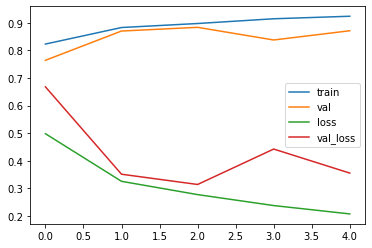

In [15]:
plt.plot(epochs,accuracy,label='train')
plt.plot(epochs,val_accuracy,label='val')
plt.plot(epochs,loss,label='loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()
plt.show()

In [16]:
model=tf.keras.models.load_model('/kaggle/working/base_cnn.h5')

In [17]:
pred=model.predict(X_test)
pred

array([[4.5381665e-02, 1.4400530e-03, 3.0361554e-01, ..., 8.3825223e-02,
        3.2543119e-03, 1.5146864e-03],
       [1.1032461e-01, 1.8446350e-03, 7.0772541e-01, ..., 8.7494281e-04,
        7.4863021e-04, 2.1394121e-03],
       [8.8154413e-02, 1.3065013e-03, 7.3144495e-01, ..., 1.4440311e-03,
        7.8440749e-04, 4.1247040e-04],
       ...,
       [8.7742819e-06, 7.9166853e-07, 4.8958202e-07, ..., 9.2370301e-06,
        1.3654408e-06, 3.0726067e-05],
       [4.6759043e-03, 1.5194061e-03, 2.1246010e-02, ..., 6.5574556e-04,
        2.0008639e-03, 4.7592446e-04],
       [9.3596282e-06, 9.9966657e-01, 4.7832850e-06, ..., 1.2918958e-05,
        7.7804780e-06, 2.0769431e-04]], dtype=float32)

In [18]:
submit['label']=np.argmax(pred,axis=1)
submit.head()

,id,label
0,11,4
1,15,2
2,17,2
3,21,7
4,22,4


In [19]:
# submit.to_csv('base_cnn.csv',index=False)